# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan merupakan dataset [Global Cybersecurity Threats (2015-2024)]("https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024/data"), yang mencatat berbagai ancaman siber yang terjadi antara tahun 2015 hingga 2024. Dataset ini mencakup berbagai informasi mengenai **jenis ancaman**, **negara yang terdampak**, **tahun kejadian**, dan lain-lain.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
#Type your code here
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [39]:
#Type your code here
URL = "https://raw.githubusercontent.com/nandapu3/Eksperimen_SML_Putri-Nanda-Sari/main/dataset/Global_Cybersecurity_Threats_2015-2024.csv"

df = pd.read_csv(URL)
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


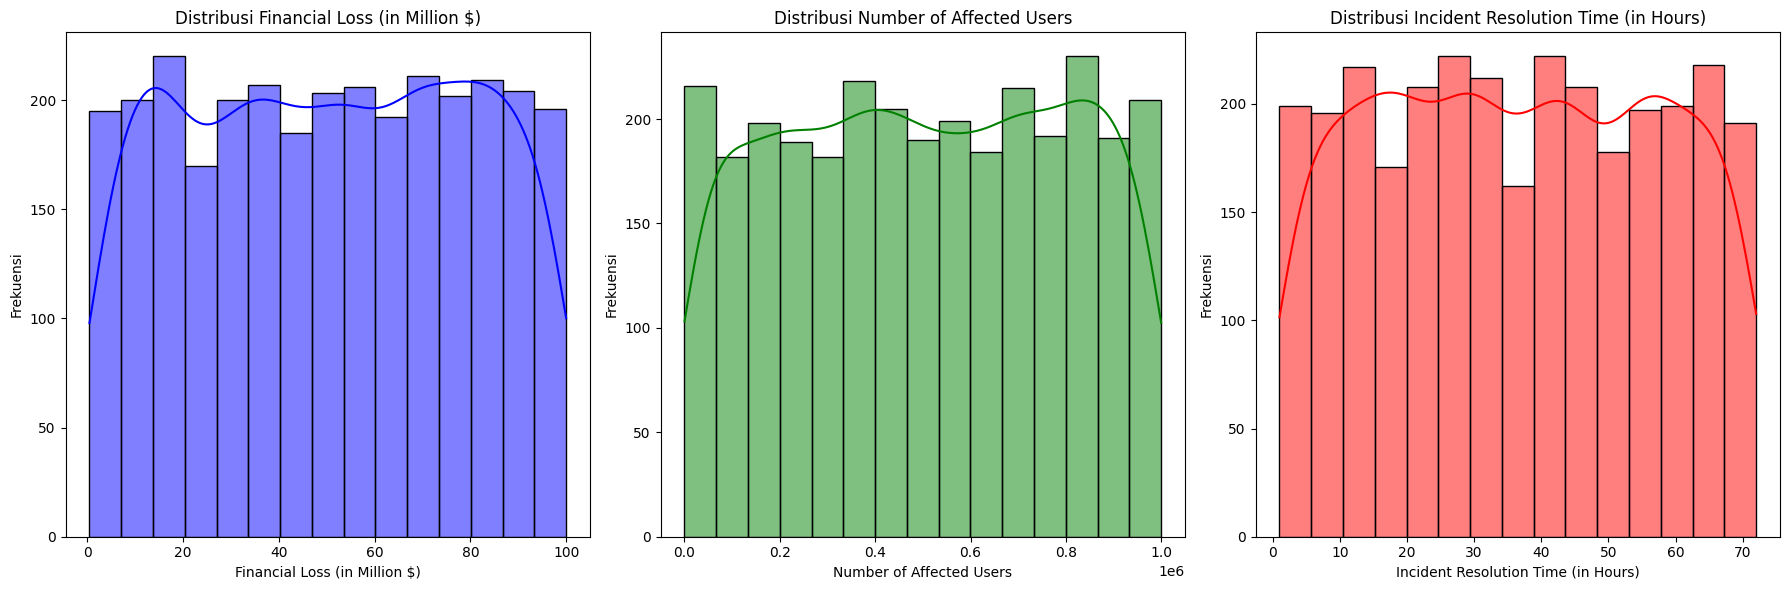

In [10]:
# 1. Visualisasi Kolom Numerik
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Financial Loss
sns.histplot(df['Financial Loss (in Million $)'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribusi Financial Loss (in Million $)')
axes[0].set_xlabel('Financial Loss (in Million $)')
axes[0].set_ylabel('Frekuensi')

# Number of Affected Users
sns.histplot(df['Number of Affected Users'], kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribusi Number of Affected Users')
axes[1].set_xlabel('Number of Affected Users')
axes[1].set_ylabel('Frekuensi')

# Incident Resolution Time (in Hours)
sns.histplot(df['Incident Resolution Time (in Hours)'], kde=True, color='red', ax=axes[2])
axes[2].set_title('Distribusi Incident Resolution Time (in Hours)')
axes[2].set_xlabel('Incident Resolution Time (in Hours)')
axes[2].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

<ipython-input-26-1229522583>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, palette='Pastel1', ax=axes[0])
<ipython-input-26-1229522583>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attack Type', data=df, palette='Pastel1', ax=axes[1])
<ipython-input-26-1229522583>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target Industry', data=df, palette='Pastel1', ax=axes[2])


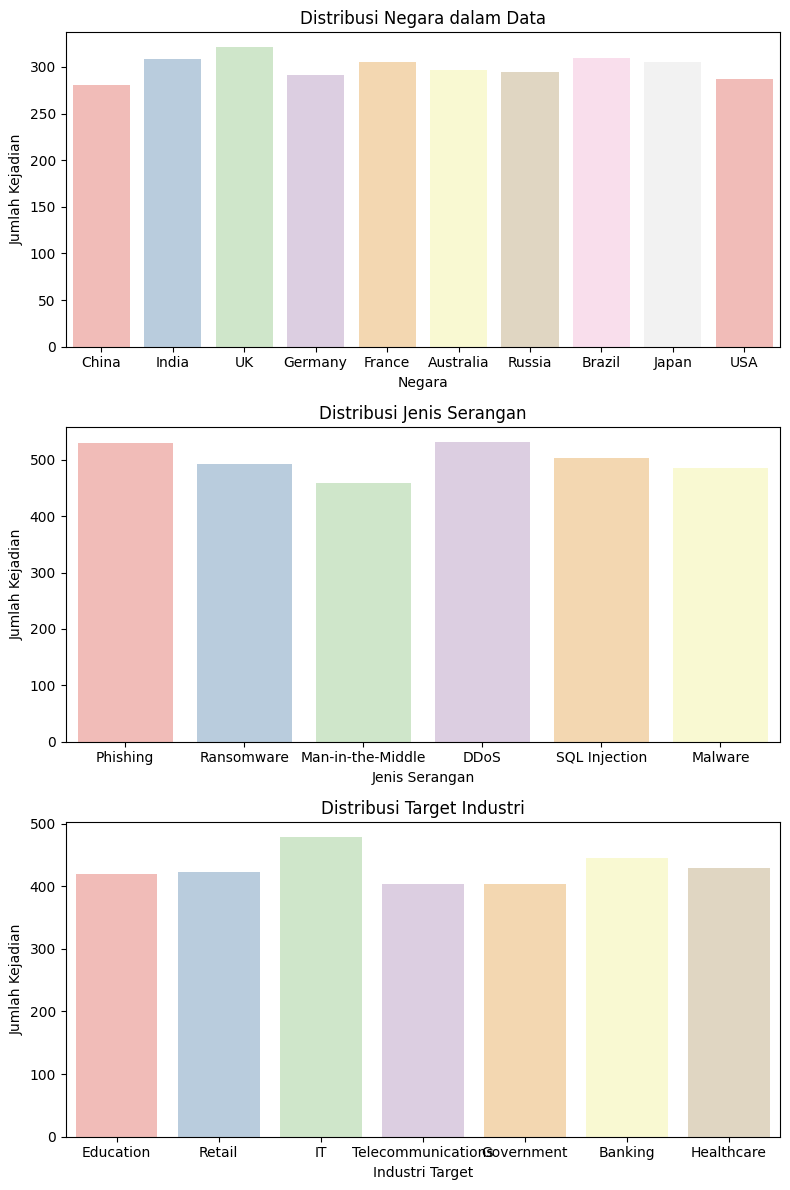

In [26]:
# Membuat grid 1 baris dan 3 kolom untuk kolom kategorikal
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
axes = axes.flatten()

# Country
sns.countplot(x='Country', data=df, palette='Pastel1', ax=axes[0])
axes[0].set_title('Distribusi Negara dalam Data')
axes[0].set_xlabel('Negara')
axes[0].set_ylabel('Jumlah Kejadian')


# Attack Type
sns.countplot(x='Attack Type', data=df, palette='Pastel1', ax=axes[1])
axes[1].set_title('Distribusi Jenis Serangan')
axes[1].set_xlabel('Jenis Serangan')
axes[1].set_ylabel('Jumlah Kejadian')


# Target Industry (Horizontal, dengan warna lebih soft)
sns.countplot(x='Target Industry', data=df, palette='Pastel1', ax=axes[2])
axes[2].set_title('Distribusi Target Industri')
axes[2].set_xlabel('Industri Target')
axes[2].set_ylabel('Jumlah Kejadian')

# Layout yang rapi
plt.tight_layout()
plt.show()

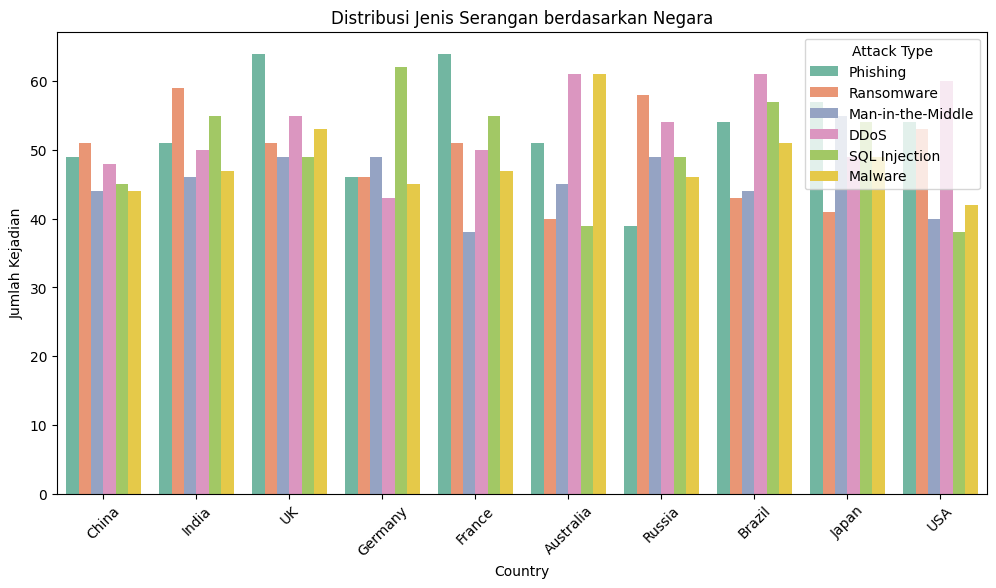

In [28]:
# Distribusi Attack Type berdasarkan Country
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', hue='Attack Type', data=df, palette='Set2')
plt.title('Distribusi Jenis Serangan berdasarkan Negara')
plt.xlabel('Country')
plt.ylabel('Jumlah Kejadian')
plt.xticks(rotation=45)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [40]:
scaler = StandardScaler()
df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']] = scaler.fit_transform(df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']])

# Cek hasil standarisasi
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,1.043437,0.926143,Hacker Group,Unpatched Software,VPN,1.289617
1,China,2019,Ransomware,Retail,0.406336,-0.719994,Hacker Group,Unpatched Software,Firewall,1.678584
2,India,2017,Man-in-the-Middle,IT,-0.411405,0.349128,Hacker Group,Weak Passwords,VPN,-0.801076
3,UK,2024,Ransomware,Telecommunications,-0.314485,0.533419,Nation-state,Social Engineering,AI-based Detection,-1.433146
4,Germany,2018,Man-in-the-Middle,IT,0.830839,1.055544,Insider,Social Engineering,VPN,1.532721


In [41]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Encoding kolom kategorikal
df['Attack Type'] = label_encoder.fit_transform(df['Attack Type'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Target Industry'] = label_encoder.fit_transform(df['Target Industry'])
df['Attack Source'] = label_encoder.fit_transform(df['Attack Source'])
df['Security Vulnerability Type'] = label_encoder.fit_transform(df['Security Vulnerability Type'])
df['Defense Mechanism Used'] = label_encoder.fit_transform(df['Defense Mechanism Used'])  # Kolom target

df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,2,2019,3,1,1.043437,0.926143,0,1,4,1.289617
1,2,2019,4,5,0.406336,-0.719994,0,1,3,1.678584
2,5,2017,2,4,-0.411405,0.349128,0,2,4,-0.801076
3,8,2024,4,6,-0.314485,0.533419,2,0,0,-1.433146
4,4,2018,2,4,0.830839,1.055544,1,0,4,1.532721


In [42]:
df.to_csv('global_security_preprocessing.csv', index=False)

print("Dataset berhasil disimpan sebagai 'processed_dataset.csv'")

Dataset berhasil disimpan sebagai 'processed_dataset.csv'
